## 1번

In [ ]:
# Task1_0530. 고객 정보 데이터프레임과 구매 내역 데이터프레임을 결합하여 각 고객이름(name) 별 총 지출을 계산하여 출력하세요.
import pandas as pd

# 고객 정보 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 내역 데이터프레임 생성
purchases = pd.DataFrame({
    'purchase_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 1, 3, 2],
    'amount': [250, 150, 200, 300, 350]
})
print(customers,'\n')
print(purchases)


   customer_id     name
0            1    Alice
1            2      Bob
2            3  Charlie
3            4    David 

   purchase_id  customer_id  amount
0          101            1     250
1          102            2     150
2          103            1     200
3          104            3     300
4          105            2     350


In [ ]:
cus_pur = pd.merge(customers,purchases,on='customer_id',how = 'left')
cus_pur.groupby('name').amount.sum()

,name,amount
0,Alice,450.0
1,Bob,500.0
2,Charlie,300.0
3,David,0.0


In [ ]:
result = customers.join(purchases.set_index('customer_id'), on = 'customer_id')
result.groupby('name').amount.sum()

name
Alice      450.0
Bob        500.0
Charlie    300.0
David        0.0
Name: amount, dtype: float64

In [ ]:
# 내부조인으로 결합
merged_df = pd.merge(customers,purchases,on='customer_id',how = 'inner')
# 고객별 총 지출 계산
total_spent = merged_df.groupby('name').amount.sum().reset_index()
print(total_spent)

## 2번

In [ ]:
# Task2_0530. 학생 성적 데이터프레임과 과목 데이터프레임을 결합하여 각 과목별 평균 성적을 계산하여 출력하세요.
import pandas as pd

# 학생 성적 데이터프레임 생성
grades = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 1, 2, 3, 4],
    'subject_id': [101, 101, 102, 102, 103, 103, 101, 103],
    'grade': [85, 90, 78, 88, 92, 95, 80, 85]
})

# 과목 데이터프레임 생성
subjects = pd.DataFrame({
    'subject_id': [101, 102, 103],
    'subject_name': ['Math', 'Science', 'History']
})
print(grades,'\n')
print(subjects)

   student_id  subject_id  grade
0           1         101     85
1           2         101     90
2           3         102     78
3           4         102     88
4           1         103     92
5           2         103     95
6           3         101     80
7           4         103     85 

   subject_id subject_name
0         101         Math
1         102      Science
2         103      History


In [ ]:
total = pd.merge(grades,subjects,on = 'subject_id')
total.groupby('subject_name').grade.mean()

subject_name
History    90.666667
Math       85.000000
Science    83.000000
Name: grade, dtype: float64

In [ ]:
total = grades.join(subjects.set_index('subject_id'), on='subject_id')
total.groupby('subject_name').grade.mean()

,subject_name,grade
0,History,90.666667
1,Math,85.000000
2,Science,83.000000


In [ ]:
# 내부조인 결합
merged_df = pd.merge(grades,subjects,on = 'subject_id',how = 'inner')
# 과목별 평균 성적 계산
average_grades = merged_df.groupby('subject_name').grade.mean().reset_index()
print(average_grades)

  subject_name      grade
0      History  90.666667
1         Math  85.000000
2      Science  83.000000


## 3번

In [ ]:
# Task3_0530. 고객 데이터프레임에서 age가 30 이상이고 spending이 500 이상인 고객을 찾아 출력하세요.
import pandas as pd

# 예제 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 35, 30, 40, 28],
    'spending': [300, 600, 500, 700, 400]
})
customers

,customer_id,name,age,spending
0,1,Alice,25,300
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700
4,5,Eve,28,400


In [ ]:
customers[(customers['age'] >= 30) & (customers['spending']>= 500)]

,customer_id,name,age,spending
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700


In [ ]:
# 조건에 만족하는 고객 찾기
con1 = customers['age'] >= 30
con2 = customers['spending']>= 500

filtered_customers = customers[con1&con2]
print(filtered_customers)

   customer_id     name  age  spending
1            2      Bob   35       600
2            3  Charlie   30       500
3            4    David   40       700


## 4번

In [ ]:
# Task4_0530. 학생 성적 데이터프레임에서 math_score가 80 이상 90 이하인 학생을 찾아 출력하세요.
import pandas as pd

# 예제 데이터프레임 생성
students = pd.DataFrame({
    'student_id': [101, 102, 103, 104, 105],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'math_score': [75, 85, 88, 92, 78],
    'english_score': [80, 78, 82, 88, 90]
})
students

,student_id,name,math_score,english_score
0,101,Alice,75,80
1,102,Bob,85,78
2,103,Charlie,88,82
3,104,David,92,88
4,105,Eve,78,90


In [ ]:
students[(80 <= students['math_score']) & (students['math_score']<= 90)]

,student_id,name,math_score,english_score
1,102,Bob,85,78
2,103,Charlie,88,82


In [ ]:
c1 = 80 <= students['math_score']
c2 = students['math_score']<= 90
filtered_students = students[c1 & c2]
print(filtered_students)

   student_id     name  math_score  english_score
1         102      Bob          85             78
2         103  Charlie          88             82


## 5번

In [ ]:
# Task5_0530. 주어진 titanic3 데이터셋에서 survived 열을 사용하여 생존자와 비생존자의 수를 계산하여 출력하세요.
import pandas as pd

# 데이터프레임 읽기
# 구글 마운트하여 사용
file_path = '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/titanic3.csv'
df = pd.read_csv(file_path)

df.survived.value_counts()

survived
0    809
1    500
Name: count, dtype: int64

## 6번

In [ ]:
# Task6_0530. 주어진 titanic3 데이터셋에서 pclass 열을 기준으로 각 객실 등급의 평균 운임(fare)을 계산하여 출력하세요.

df.groupby('pclass').fare.mean()

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

## 7번

In [ ]:
# Task7_0530. titanic3 각 변수의 상관계수를 통해 각 변수와 목표 변수(생존 여부) 간의 관계를 파악하세요.

# 숫자형 데이터 타입만 가진 컬럼만 선택
df_number = df.select_dtypes(include=[np.number]).columns

# 생존여부간의 상관계수
df[df_number].corr()['survived']

pclass     -0.312469
survived    1.000000
age        -0.055512
sibsp      -0.027825
parch       0.082660
fare        0.244265
body             NaN
Name: survived, dtype: float64

In [ ]:
import numpy as np

# 문자열 변수를 숫자형으로 변환
df['sex'] = df['sex'].map({'male':0,'female':0})

# 숫자형 변수만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 상관계수 계산
correlation_matrix = numeric_df.corr()

# 생존 여부와의 상관계수 정렬
survival_correlation = correlation_matrix['survived'].sort_values(ascending=False)
print(survival_correlation)

survived    1.000000
fare        0.244265
parch       0.082660
sibsp      -0.027825
age        -0.055512
pclass     -0.312469
sex              NaN
body             NaN
Name: survived, dtype: float64


## 8번

In [ ]:
# Task8_0530. 승객의 가족 크기(동반한 형제자매/배우자 수와 부모/자녀 수의 합)가 생존에 영향을 미치는지를 탐색하여 결과를 출력하세요.
df.parch.value_counts()

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64

In [ ]:
# parch별로 전체 사람수
total_sur_count = df.groupby('parch').count()
# parch별 생존한 사람수
sur_count = df[df['survived'] ==1].groupby('parch').count()
# 생존한 사람/ 전체사람 * 100 , parch별 생존률
sur_count.survived/total_sur_count.survived *100

parch
0    33.532934
1    58.823529
2    50.442478
3    62.500000
4    16.666667
5    16.666667
6          NaN
9          NaN
Name: survived, dtype: float64

In [ ]:
df[['parch','survived']].corr()
df[['parch','survived']].corr()['survived']

parch       0.08266
survived    1.00000
Name: survived, dtype: float64

In [ ]:
# 가족 크기 계산
df['family_size'] = df['sibsp']+df['parch']

# 생존 여부와 가족 크기의 관계 탐색
survival_family_correlation = df[['family_size','survived']].corr().iloc[0,1]
print(survival_family_correlation)

0.02687643412533259


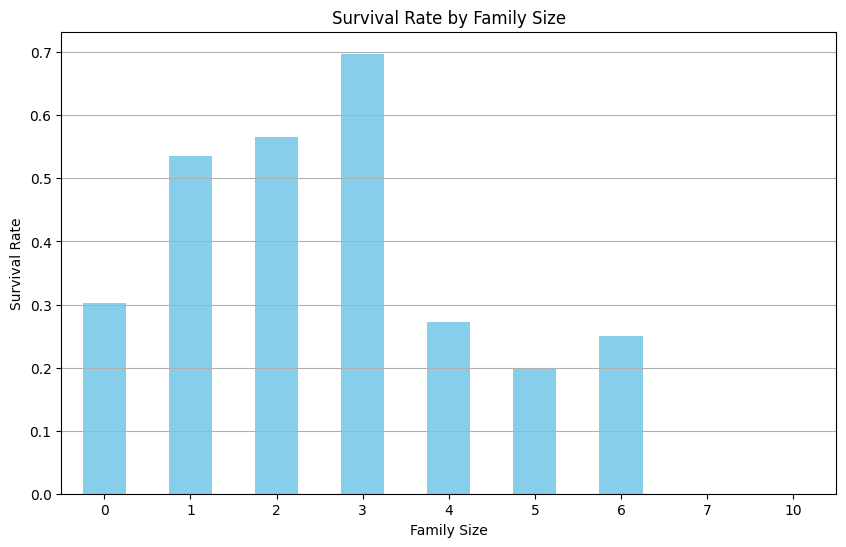

In [ ]:
import matplotlib.pyplot as plt

# 가족 크기별 생존율 계산
family_survival_rate = df.groupby('family_size')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

## 9번

In [ ]:
# Task9_0530. 객실 등급별 평균 요금(mean_fare_by_pclass)이 생존에 미치는 영향을 분석하기 위해 mean_fare_by_pclass라는 파생 변수를 생성하여 출력하세요.

total_sur_count = df.groupby('pclass').fare.mean()

sur_count = df[df['survived'] ==1].groupby('pclass').fare.mean()

mean_fare_by_pclass = sur_count / total_sur_count * 100

print(mean_fare_by_pclass)

pclass
1    112.015134
2    108.635489
3     97.098601
Name: fare, dtype: float64


In [ ]:
# 객실 등급별 평균 요금 계산
mean_fare_by_pclass = df.groupby('pclass')['fare'].mean().to_dict()
print(mean_fare_by_pclass, '\n')
# 객실 등급ㄱ별 평균 요금 파생 변수 생성
df['mean_fare_by_pclass'] = df['pclass'].map(mean_fare_by_pclass)

df[['pclass','fare','mean_fare_by_pclass']].head()

{1: 84.1546875, 2: 20.662183152173913, 3: 13.675550101832993} 



,pclass,fare,mean_fare_by_pclass
0,3,7.2500,13.675550
1,1,71.2833,84.154687
2,3,7.9250,13.675550
3,1,53.1000,84.154687
4,3,8.0500,13.675550


In [ ]:
# mean_fare_by_pclass와 생존 여부 간의 상관계수 계산
mean_fare_survival_correlation = df[['mean_fare_by_pclass', 'survived']].corr().iloc[0,1]

mean_fare_survival_correlation

0.3015503018213808

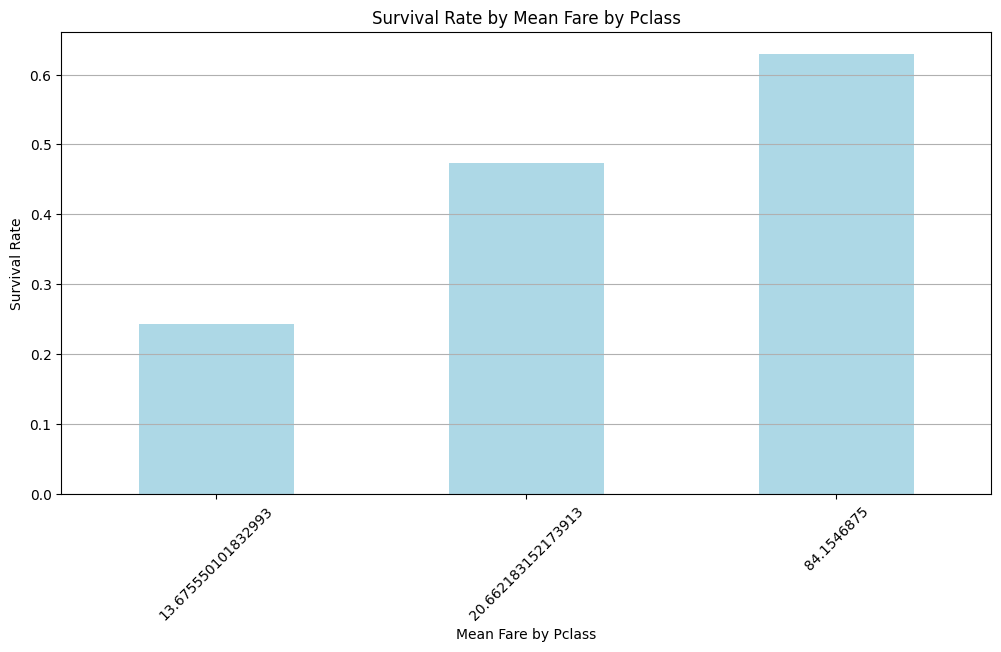

In [ ]:
#  생존율과 Mean Fare by Pclass 간의 막대그래프 그리기

# 생존율 계산
survival_rate_by_fare = df.groupby('mean_fare_by_pclass')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))
survival_rate_by_fare.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Mean Fare by Pclass')
plt.xlabel('Mean Fare by Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()